In [20]:
print(">>> [Test Cell 04] Bắt đầu chạy...")

import pandas as pd
import numpy as np
import os
import sys
import json
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# --- Xử lý lỗi thư viện 'tabulate' (dùng để in bảng đẹp) ---
try:
    from tabulate import tabulate
    HAS_TABULATE = True
except ImportError:
    print("Cảnh báo: Thư viện 'tabulate' không được cài đặt. Bảng sẽ được in ở dạng cơ bản.")
    print("Để in bảng đẹp, hãy chạy: pip install tabulate")
    HAS_TABULATE = False

>>> [Test Cell 04] Bắt đầu chạy...


In [21]:
# %%
print("[Cell] Đang thiết lập cấu hình...")

# SỬA LỖI PATH: Dùng os.getcwd() thay vì __file__
try:
    # Giả định notebook này nằm trong thư mục /notebooks
    CURRENT_DIR = os.getcwd() 
    ROOT_DIR = os.path.abspath(os.path.join(CURRENT_DIR, os.pardir))
    
    # Định nghĩa các đường dẫn BÁO CÁO mà file này cần
    REPORTS_DIR = os.path.join(ROOT_DIR, 'reports')
    FIGURES_DIR = os.path.join(REPORTS_DIR, 'figures') # Cần để lưu biểu đồ
    RESULTS_DIR = os.path.join(REPORTS_DIR, 'results') # Cần để đọc .json
    
    print(f"Thư mục gốc (ROOT_DIR): {ROOT_DIR}")
    print(f"Đường dẫn thư mục Results (để đọc): {RESULTS_DIR}")
    print(f"Đường dẫn thư mục Figures (để lưu): {FIGURES_DIR}")

except Exception as e:
    print(f"Lỗi khi thiết lập đường dẫn: {e}")
    print("Hãy đảm bảo bạn đang chạy notebook này từ thư mục /notebooks")

[Cell] Đang thiết lập cấu hình...
Thư mục gốc (ROOT_DIR): c:\Users\Admin\OneDrive\Documents\Vscode\Student\ML\Midterm\Chau
Đường dẫn thư mục Results (để đọc): c:\Users\Admin\OneDrive\Documents\Vscode\Student\ML\Midterm\Chau\reports\results
Đường dẫn thư mục Figures (để lưu): c:\Users\Admin\OneDrive\Documents\Vscode\Student\ML\Midterm\Chau\reports\figures


In [22]:
print("\n[Cell] Đang tải các file kết quả .json từ /reports/results/...")

# Danh sách các file kết quả mà 3 notebook kia đã tạo
result_files = ['linear_results.json', 'knn_results.json', 'mlp_results.json']
all_results_list = []
found_files = 0

for f_name in result_files:
    file_path = os.path.join(RESULTS_DIR, f_name)
    
    if os.path.exists(file_path):
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
                all_results_list.extend(data) # Thêm kết quả (là list) vào list tổng
            print(f"Đã tải thành công: {f_name}")
            found_files += 1
        except Exception as e:
            print(f"LỖI: Không thể đọc file {f_name}. {e}")
    else:
        print(f"CẢNH BÁO: Không tìm thấy file {f_name}.")
        print(f"(Bạn cần chạy 3 file notebook (01, 02, 03) trước)")

if not all_results_list:
    print("\nLỖI NGHIÊM TRỌNG: Không tìm thấy file kết quả nào. Dừng chương trình.")
    sys.exit(1) # Thoát nếu không có file nào

# Chuyển đổi tất cả kết quả thành một DataFrame duy nhất
df_results = pd.DataFrame(all_results_list)
print("\n[Cell] Đã gộp tất cả kết quả thành công.")


[Cell] Đang tải các file kết quả .json từ /reports/results/...
Đã tải thành công: linear_results.json
Đã tải thành công: knn_results.json
Đã tải thành công: mlp_results.json

[Cell] Đã gộp tất cả kết quả thành công.


BẢNG TỔNG HỢP KẾT QUẢ TỪ 3 MÔ HÌNH

In [23]:
def print_table(df, title):
    print(title)
    if HAS_TABULATE:
        print(df.to_markdown(index=False, floatfmt=".4f"))
    else:
        print(df) # In dạng cơ bản nếu không có tabulate

In [24]:
df_sorted_r2 = df_results.sort_values(by='R-Squared', ascending=False).reset_index(drop=True)
print_table(df_sorted_r2, "\n--- Xếp hạng theo R-Squared (Cao nhất là Tốt nhất) ---")

best_r2_model = df_sorted_r2.iloc[0]
print(f"\n🏆 MÔ HÌNH TỐT NHẤT (THEO R²): {best_r2_model['Model']} ({best_r2_model['Features']})")
print(f"   -> R² = {best_r2_model['R-Squared']:.4f}")


--- Xếp hạng theo R-Squared (Cao nhất là Tốt nhất) ---
| Model                | Features   |   R-Squared |    MAE |     MSE |   RMSE |
|:---------------------|:-----------|------------:|-------:|--------:|-------:|
| Custom MLP (L2=0.05) | Full       |      0.9859 | 1.7600 | 29.2737 | 5.4105 |
| KNN                  | Full       |      0.9812 | 2.2358 | 39.1332 | 6.2556 |
| Linear Regression    | Full       |      0.9784 | 2.9266 | 44.9251 | 6.7026 |
| KNN                  | PCA        |      0.9759 | 2.6676 | 50.1321 | 7.0804 |
| Linear Regression    | PCA        |      0.9674 | 3.4024 | 67.8638 | 8.2380 |
| Custom MLP (L2=0.05) | PCA        |      0.9597 | 3.1219 | 83.8384 | 9.1563 |

🏆 MÔ HÌNH TỐT NHẤT (THEO R²): Custom MLP (L2=0.05) (Full)
   -> R² = 0.9859


In [25]:
# --- Hiển thị theo MAE (Mean Absolute Error) (Thấp nhất là tốt nhất) ---
df_sorted_mae = df_results.sort_values(by='MAE', ascending=True).reset_index(drop=True)
print_table(df_sorted_mae, "\n--- Xếp hạng theo MAE (Thấp nhất là Tốt nhất) ---")

best_mae_model = df_sorted_mae.iloc[0]
print(f"\n🏆 MÔ HÌNH TỐT NHẤT (THEO MAE): {best_mae_model['Model']} ({best_mae_model['Features']})")
print(f"   -> MAE = {best_mae_model['MAE']:.4f}")


--- Xếp hạng theo MAE (Thấp nhất là Tốt nhất) ---
| Model                | Features   |   R-Squared |    MAE |     MSE |   RMSE |
|:---------------------|:-----------|------------:|-------:|--------:|-------:|
| Custom MLP (L2=0.05) | Full       |      0.9859 | 1.7600 | 29.2737 | 5.4105 |
| KNN                  | Full       |      0.9812 | 2.2358 | 39.1332 | 6.2556 |
| KNN                  | PCA        |      0.9759 | 2.6676 | 50.1321 | 7.0804 |
| Linear Regression    | Full       |      0.9784 | 2.9266 | 44.9251 | 6.7026 |
| Custom MLP (L2=0.05) | PCA        |      0.9597 | 3.1219 | 83.8384 | 9.1563 |
| Linear Regression    | PCA        |      0.9674 | 3.4024 | 67.8638 | 8.2380 |

🏆 MÔ HÌNH TỐT NHẤT (THEO MAE): Custom MLP (L2=0.05) (Full)
   -> MAE = 1.7600


In [26]:
# --- Hiển thị theo RMSE (Root Mean Squared Error) (Thấp nhất là tốt nhất) ---
df_sorted_rmse = df_results.sort_values(by='RMSE', ascending=True).reset_index(drop=True)
print_table(df_sorted_rmse, "\n--- Xếp hạng theo RMSE (Thấp nhất là Tốt nhất) ---")

best_rmse_model = df_sorted_rmse.iloc[0]
print(f"\n🏆 MÔ HÌNH TỐT NHẤT (THEO RMSE): {best_rmse_model['Model']} ({best_rmse_model['Features']})")
print(f"   -> RMSE = {best_rmse_model['RMSE']:.4f}")


--- Xếp hạng theo RMSE (Thấp nhất là Tốt nhất) ---
| Model                | Features   |   R-Squared |    MAE |     MSE |   RMSE |
|:---------------------|:-----------|------------:|-------:|--------:|-------:|
| Custom MLP (L2=0.05) | Full       |      0.9859 | 1.7600 | 29.2737 | 5.4105 |
| KNN                  | Full       |      0.9812 | 2.2358 | 39.1332 | 6.2556 |
| Linear Regression    | Full       |      0.9784 | 2.9266 | 44.9251 | 6.7026 |
| KNN                  | PCA        |      0.9759 | 2.6676 | 50.1321 | 7.0804 |
| Linear Regression    | PCA        |      0.9674 | 3.4024 | 67.8638 | 8.2380 |
| Custom MLP (L2=0.05) | PCA        |      0.9597 | 3.1219 | 83.8384 | 9.1563 |

🏆 MÔ HÌNH TỐT NHẤT (THEO RMSE): Custom MLP (L2=0.05) (Full)
   -> RMSE = 5.4105



[Cell] Đang tạo biểu đồ so sánh (Phiên bản Nhóm - ĐÃ SỬA LỖI)...
Đã lưu biểu đồ so sánh NHÓM R-Squared tại: c:\Users\Admin\OneDrive\Documents\Vscode\Student\ML\Midterm\Chau\reports\figures\bar_grouped_comparison_r-squared.png


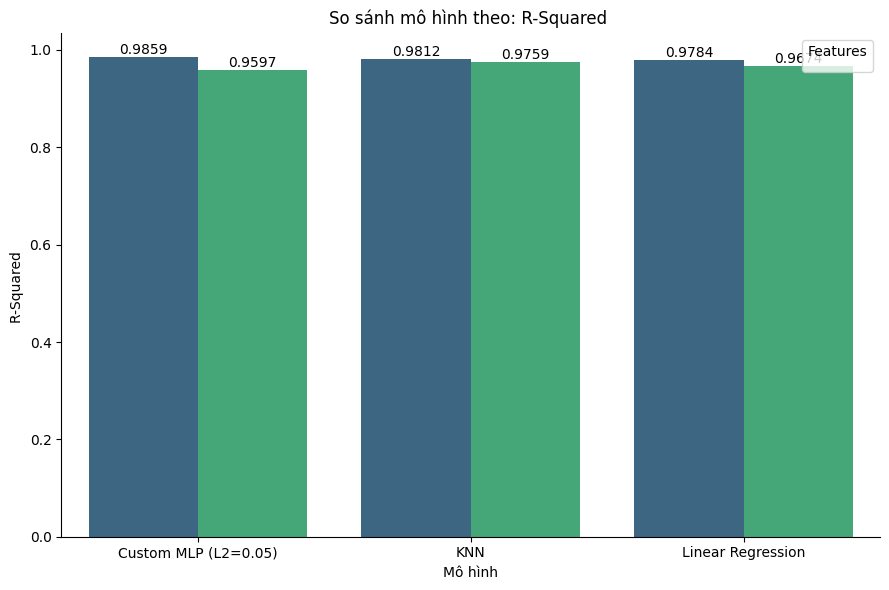

Đã lưu biểu đồ so sánh NHÓM MAE tại: c:\Users\Admin\OneDrive\Documents\Vscode\Student\ML\Midterm\Chau\reports\figures\bar_grouped_comparison_mae.png


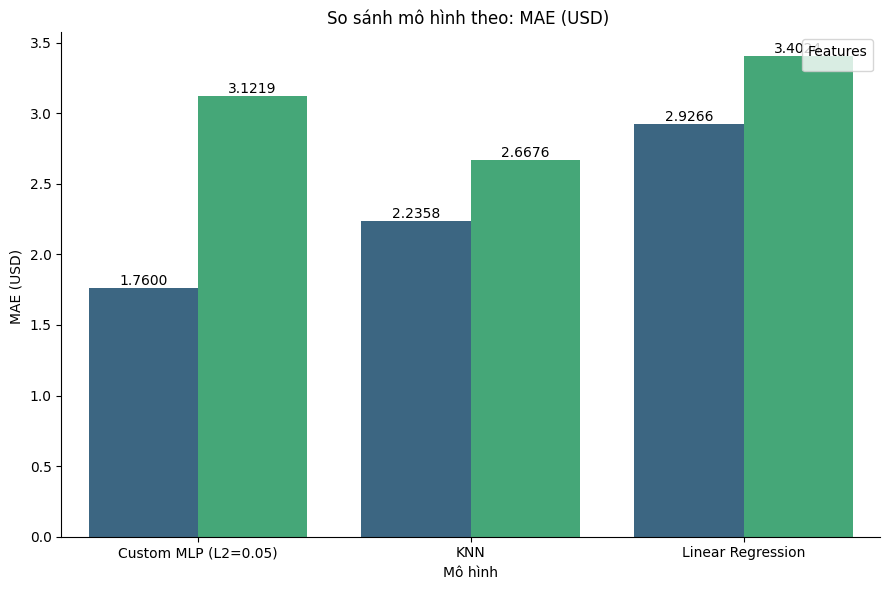

Đã lưu biểu đồ so sánh NHÓM RMSE tại: c:\Users\Admin\OneDrive\Documents\Vscode\Student\ML\Midterm\Chau\reports\figures\bar_grouped_comparison_rmse.png


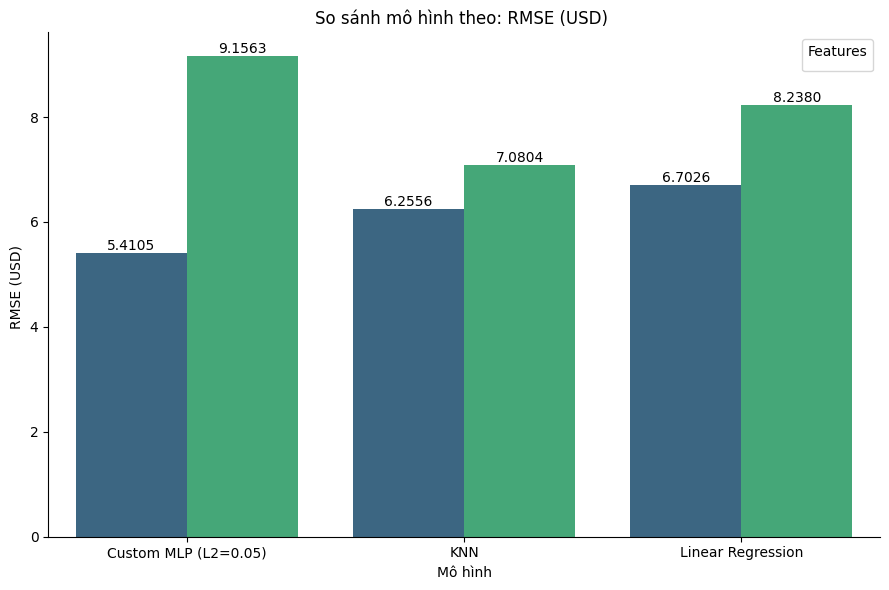


>>> [Test Cell 04] Đã chạy xong.


In [28]:
# %%
print("\n[Cell] Đang tạo biểu đồ so sánh (Phiên bản Nhóm - ĐÃ SỬA LỖI)...")

# Tạo 3 biểu đồ
metrics_to_plot = [
    {'metric': 'R-Squared', 'label': 'R-Squared ', 'ascending': False},
    {'metric': 'MAE', 'label': 'MAE (USD) ', 'ascending': True},
    {'metric': 'RMSE', 'label': 'RMSE (USD) ', 'ascending': True}
]

# --- ### THAY ĐỔI LOGIC VẼ ### ---
for item in metrics_to_plot:
    metric = item['metric']
    label = item['label']
    is_ascending = item['ascending']
    
    df_sorted_viz = df_results.sort_values(by=['Model', metric], ascending=[True, is_ascending])

    # Sử dụng catplot để tạo biểu đồ cột nhóm
    g = sns.catplot(
        data=df_sorted_viz,
        kind='bar',        
        x='Model',         
        y=metric,          
        hue='Features',    
        palette='viridis',   
        height=6,          
        aspect=1.5,
        # --- ### THAY ĐỔI 1: TẮT CHÚ THÍCH (LEGEND) MẶC ĐỊNH ### ---
        legend=False       
    )
    
    # Lấy đối tượng Axes để tùy chỉnh
    ax = g.ax

    # Thêm giá trị (label) vào các thanh bar
    try:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.4f')
    except Exception as e:
        print(f"Không thể thêm nhãn vào biểu đồ (có thể do phiên bản seaborn): {e}")

    # Tùy chỉnh tiêu đề và nhãn
    ax.set_title(f"So sánh mô hình theo: {label}")
    ax.set_ylabel(label) 
    ax.set_xlabel("Mô hình")   

    # --- ### THAY ĐỔI 2: VẼ LẠI CHÚ THÍCH Ở VỊ TRÍ MONG MUỐN ### ---
    # (Bỏ dòng lỗi: g.move_legend(loc="upper right"))
    ax.legend(loc='upper right', title='Features')
    
    plt.tight_layout()
    
    # Lưu biểu đồ
    fig_path_bar = os.path.join(FIGURES_DIR, f'bar_grouped_comparison_{metric.lower()}.png')
    try:
        plt.savefig(fig_path_bar)
        print(f"Đã lưu biểu đồ so sánh NHÓM {metric} tại: {fig_path_bar}")
    except Exception as e:
        print(f"Lỗi khi lưu hình ảnh: {e}")

    plt.show()

print("\n>>> [Test Cell 04] Đã chạy xong.")